In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path1 = os.getcwd()

In [9]:
path = os.path.join(path1,'iris.csv')

In [85]:
data = pd.read_csv(path,sep=',')

In [14]:
X=data.drop(['class'],axis=1)

In [80]:
X1 = data.iloc[:,[2,4]]

In [81]:
X1

,petal_length,class
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
...,...,...
145,5.2,Iris-virginica
146,5.0,Iris-virginica
147,5.2,Iris-virginica
148,5.4,Iris-virginica


In [15]:
Y=data['class']

In [16]:
def train_test_split(X,Y,test_size=0.25, random=True, random_seed=None):
    X=np.array(X)
    Y=np.array(Y)
    indices = np.array(range(len(X)))
    test_size_len = round(len(X)*test_size)
    
    if random==True:
        if random_seed!=None:
            rg= np.random.RandomState(random_seed)
            rg.shuffle(indices)
            
        else :
            np.random.shuffle(indices)
            
        tr_indices = indices[test_size_len:]
        ts_indices = indices[:test_size_len]
        X_train = X[tr_indices,:]
        X_test = X[ts_indices]
        Y_train = Y[tr_indices]
        Y_test = Y[ts_indices]
        
    else : 
        X_test = X[:test_size_len,]
        X_train = X[test_size_len:,]
        Y_test = Y[:test_size_len]
        Y_train = Y[test_size_len]
        
    return X_train,X_test, Y_train,Y_test

In [34]:
class KNN:
    def __init__(self,k=5):
        self.k = k
        self.neighbors = None
        
    def euclidean_dist(self,obs1,obs2):
        return np.sqrt(np.sum((obs1-obs2)**2))
    
    def manhattan_dist(self,obs1,obs2):
        return np.sum(np.abs(obs1-obs2))
    
    def search_neighbors(self,X_train, test_sample):
        dists_info = list()
        for index, train_sample in enumerate(X_train):
            dist = self.manhattan_dist(train_sample,test_sample)
            dists_info.append((dist,index,train_sample))
            
        dists_info.sort(key = lambda x:x[0])
        
        return dists_info[:self.k]
    
    def predict(self,X_train, Y_train, test_sample):
        self.neighbors = self.search_neighbors(X_train,test_sample)
        pred_indices = [index[1] for index in self.neighbors]
        Y_set = Y_train[pred_indices]
        classes, counts = np.unique(Y_set, return_counts=True)
        return classes[np.argmax(counts)]

In [35]:
knn = KNN(5)

In [73]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random=True, random_seed=100)

In [74]:
predicted = list()
for test_sample in X_test:
    
    predicted.append(knn.predict(X_train,Y_train,test_sample))
    

In [75]:
pr = np.array(predicted)

In [76]:
accuracy = np.sum(Y_test==pr)/len(Y_test)

In [77]:
error_rate = 1-accuracy

In [78]:
print('정확도 : {:.2f}\n 오류도 :{:.2f}'.format(accuracy*100,error_rate*100))

정확도 : 97.37
 오류도 :2.63


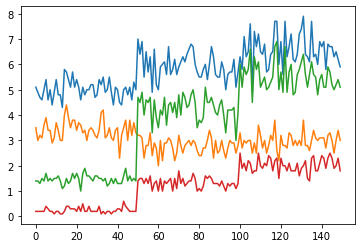

In [89]:
plt.plot(X)

In [91]:
pd.get_dummies(data)

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [92]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
grouped = data.groupby('class')

In [94]:
grouped

In [100]:
grouped['petal_length'].mean()

class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64